In [190]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [192]:
from our_mpeg import (
    compress_image,
    compress_image_with_reference,
    compress_image_with_dual_reference,
    decompress_image_with_dual_reference,
    decompress_image,
    load
)

In [194]:
example = load("/home/sidor/Dropbox/light_filed_video/bottle.zip")

In [195]:
import os
import gzip

def append_compressed(filename, im1_offsets, im1_residuals_q):
    with gzip.open(filename, 'ab+') as f:
        np.save(f, np.array(im1_offsets, dtype=np.int8))
        np.save(f, np.array(im1_residuals_q))
        
#     with gzip.open(filename, 'rb') as f:
#         a = np.load(f)
#         b = np.load(f)
#         print("ERROR", np.linalg.norm(a - np.array(im1_offsets)), a.dtype)
#         print("ERROR", np.linalg.norm(b - np.array(im1_residuals_q)), b.dtype)
#         print(f.name)

# Compression with no reference

In [196]:
FILENAME = '/tmp/video.mp4.gz'

if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for t in range(example.shape[0]):
    cur_img = example[t,0,0,:,:, :]

    a = compress_image(cur_img)
    with gzip.open(FILENAME, 'ab+') as f:
        np.save(f, np.array(a))

    print("Timestep", t, "Size after zipping", os.path.getsize(FILENAME), flush=True)

Timestep 0 Size after zipping 33878
Timestep 1 Size after zipping 67825
Timestep 2 Size after zipping 101883
Timestep 3 Size after zipping 135976
Timestep 4 Size after zipping 170127
Timestep 5 Size after zipping 204536
Timestep 6 Size after zipping 239324
Timestep 7 Size after zipping 274144
Timestep 8 Size after zipping 309149
Timestep 9 Size after zipping 344512
Timestep 10 Size after zipping 380043
Timestep 11 Size after zipping 415690
Timestep 12 Size after zipping 451584
Timestep 13 Size after zipping 487467
Timestep 14 Size after zipping 523448
Timestep 15 Size after zipping 559562
Timestep 16 Size after zipping 595714
Timestep 17 Size after zipping 631762
Timestep 18 Size after zipping 667998
Timestep 19 Size after zipping 704254
Timestep 20 Size after zipping 740599
Timestep 21 Size after zipping 777132
Timestep 22 Size after zipping 813590
Timestep 23 Size after zipping 850478
Timestep 24 Size after zipping 887485
Timestep 25 Size after zipping 924736
Timestep 26 Size after z

# Compression with prev as reference

In [211]:
FILENAME = '/tmp/video.mp4.gz'

if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for t in range(example.shape[0] - 1):
    next_img = example[t+1,0,0,:,:, :]
    prev_img = example[t,0,0,:,:,:]

    a, b = compress_image_with_reference(next_img, prev_img)
    append_compressed(FILENAME, a, b)

    print("Timestep", t, "Size after zipping", os.path.getsize(FILENAME), flush=True)

Timestep 0 Size after zipping 3783
Timestep 1 Size after zipping 8918
Timestep 2 Size after zipping 14600
Timestep 3 Size after zipping 20342
Timestep 4 Size after zipping 26532
Timestep 5 Size after zipping 32844
Timestep 6 Size after zipping 38952
Timestep 7 Size after zipping 45186
Timestep 8 Size after zipping 51834
Timestep 9 Size after zipping 58856
Timestep 10 Size after zipping 66350
Timestep 11 Size after zipping 74308
Timestep 12 Size after zipping 82872
Timestep 13 Size after zipping 91884
Timestep 14 Size after zipping 101475
Timestep 15 Size after zipping 111608
Timestep 16 Size after zipping 122620
Timestep 17 Size after zipping 133779
Timestep 18 Size after zipping 145369
Timestep 19 Size after zipping 157307
Timestep 20 Size after zipping 169536
Timestep 21 Size after zipping 181757
Timestep 22 Size after zipping 194431
Timestep 23 Size after zipping 207128
Timestep 24 Size after zipping 220166
Timestep 25 Size after zipping 233501
Timestep 26 Size after zipping 246975


In [199]:
FILENAME = '/tmp/video.mp4.gz'

if os.path.exists(FILENAME):
    _ = os.remove(FILENAME)

for t in range(example.shape[0] - 1):
    next_img = example[t+1,0,0,:,:, :]
    prev_img = example[t,0,0,:,:,:]
    prev_img_2 = example[t+1,1,0,:,:]

    a, b = compress_image_with_dual_reference(next_img, prev_img, prev_img_2)
    append_compressed(FILENAME, a, b)

    print("Timestep", t, "Size after zipping", os.path.getsize(FILENAME), flush=True)

KeyboardInterrupt: 

In [22]:
a

[[((0, 0), (0, 0)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (0, -2)),
  ((1, 2), (0, -2)),
  ((0, -1), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, -1), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (1, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, -1), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (0, -2)),
  ((0, 0), (0, -2)),
  ((1, 2), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, 0), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (0, -2)),
  ((0, -2), (1, -2)),
  ((0, -2), (2, -2)),
  ((0, -2), (2, -2)),

In [203]:
from PIL import Image

In [ ]:
next_img   = example[1,0,0,:,:,:]
prev_img   = example[0,0,0,:,:,:]
prev_img_2 = example[1,1,0,:,:,:]
a, b = compress_image_with_dual_reference(next_img, prev_img, prev_img_2)

In [240]:
im = decompress_image_with_dual_reference(a, b, prev_img, prev_img_2)

311.657


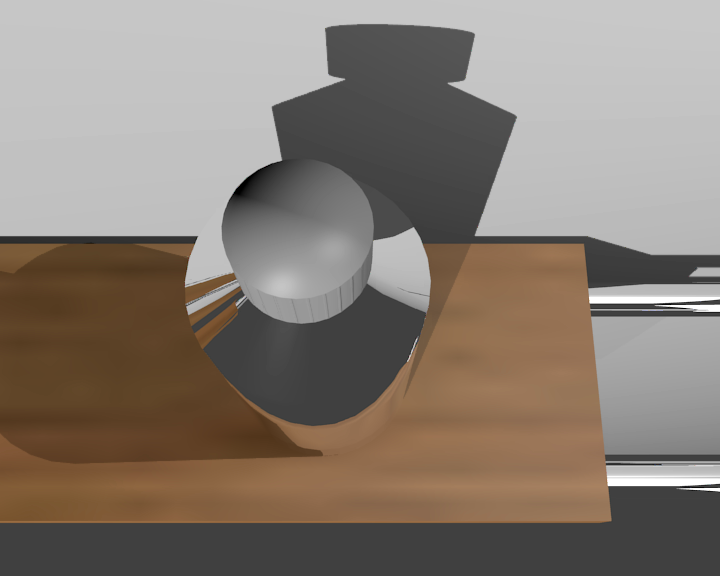

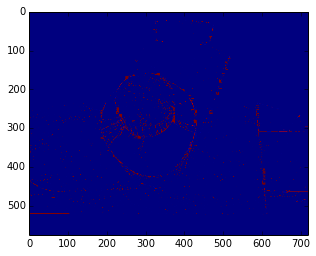

In [241]:
plt.imshow(im[:,:,0] - next_img[:,:,0])
print (np.linalg.norm(im[:,:,0].astype(np.float32) - next_img[:,:,0].astype(np.float32)))
Image.fromarray(im, "YCbCr").convert("RGB")

In [209]:
xxxx = compress_image(next_img)
im = decompress_image(xxxx)